In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy.stats import norm
from scipy.stats import chi2
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
# plt.style.use('dark_background')

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

## Simulations

In [3]:
# Temperature by Sample: S1,S2,...,S10
tempS1 = pd.read_csv("Samples/output/New_Samples/outputSample1.csv",skiprows = 4)
tempS2 = pd.read_csv("Samples/output/New_Samples/outputSample2.csv",skiprows = 4)
tempS3 = pd.read_csv("Samples/output/New_Samples/outputSample3.csv",skiprows = 4)
tempS4 = pd.read_csv("Samples/output/New_Samples/outputSample4.csv",skiprows = 4)
tempS5 = pd.read_csv("Samples/output/New_Samples/outputSample5.csv",skiprows = 4)
tempS6 = pd.read_csv("Samples/output/New_Samples/outputSample6.csv",skiprows = 4)
tempS7 = pd.read_csv("Samples/output/New_Samples/outputSample7.csv",skiprows = 4)
tempS8 = pd.read_csv("Samples/output/New_Samples/outputSample8.csv",skiprows = 4)
tempS9 = pd.read_csv("Samples/output/New_Samples/outputSample9.csv",skiprows = 4)
tempS10 = pd.read_csv("Samples/output/New_Samples/outputSample10.csv",skiprows = 4)
tempSLab = tempS1.columns # header labels

In [4]:
# Temperature by data collection point 
temp_all =[tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10]
time_all = list(tempS1['Time [s]'])
pt0,pt1,pt2,pt3,pt4 =[],[],[],[],[]  # center points: tempSLab[1],tempSLab[6],tempSLab[11],tempSLab[16],tempSLab[21]
p0t0,p1t0,p2t0,p3t0,p4t0 = [],[],[],[],[]
p0t2,p1t2,p2t2,p3t2,p4t2 = [],[],[],[],[]
p0t5,p1t5,p2t5,p3t5,p4t5 = [],[],[],[],[]
p0t10,p1t10,p2t10,p3t10,p4t10 = [],[],[],[],[]
p0t11,p1t11,p2t11,p3t11,p4t11 = [],[],[],[],[]
p0t12,p1t12,p2t12,p3t12,p4t12 = [],[],[],[],[]
i = 0
while i<10:
    p0 = temp_all[i]['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']
    p1 = temp_all[i]['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']
    p2 = temp_all[i]['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']
    p3 = temp_all[i]['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']
    p4 = temp_all[i]['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']
    pt0.append(p0);pt1.append(p1);pt2.append(p2);pt3.append(p3);pt4.append(p4)
    indx0 = time_all.index(0.00999999978)
    p0t0.append(p0[indx0]);p1t0.append(p1[indx0]);p2t0.append(p2[indx0]);p3t0.append(p3[indx0]);p4t0.append(p4[indx0])
    indx2 = time_all.index(2)
    p0t2.append(p0[indx2]);p1t2.append(p1[indx2]);p2t2.append(p2[indx2]);p3t2.append(p3[indx2]);p4t2.append(p4[indx2])
    indx5 = time_all.index(5)
    p0t5.append(p0[indx5]);p1t5.append(p1[indx5]);p2t5.append(p2[indx5]);p3t5.append(p3[indx5]);p4t5.append(p4[indx5])
    indx10 = time_all.index(10)
    p0t10.append(p0[indx10]);p1t10.append(p1[indx10]);p2t10.append(p2[indx10]);p3t10.append(p3[indx10]);p4t10.append(p4[indx10])
    indx11 = time_all.index(11)
    p0t11.append(p0[indx11]);p1t11.append(p1[indx11]);p2t11.append(p2[indx11]);p3t11.append(p3[indx11]);p4t11.append(p4[indx11])
    indx12 = time_all.index(12)
    p0t12.append(p0[indx12]);p1t12.append(p1[indx12]);p2t12.append(p2[indx12]);p3t12.append(p3[indx12]);p4t12.append(p4[indx12])
    i+=1

In [23]:
pointsByTime2  = np.array([p0t2 ,p1t2 ,p2t2 ,p3t2 ,p4t2 ]);
pointsByTime5  = np.array([p0t5 ,p1t5 ,p2t5 ,p3t5 ,p4t5 ]);
pointsByTime10  = np.array([p0t10 ,p1t10 ,p2t10 ,p3t10 ,p4t10 ]);
pointsByTime11  = np.array([p0t11 ,p1t11 ,p2t11 ,p3t11 ,p4t11 ]);
pointsByTime12  = np.array([p0t12 ,p1t12 ,p2t12 ,p3t12 ,p4t12 ]);

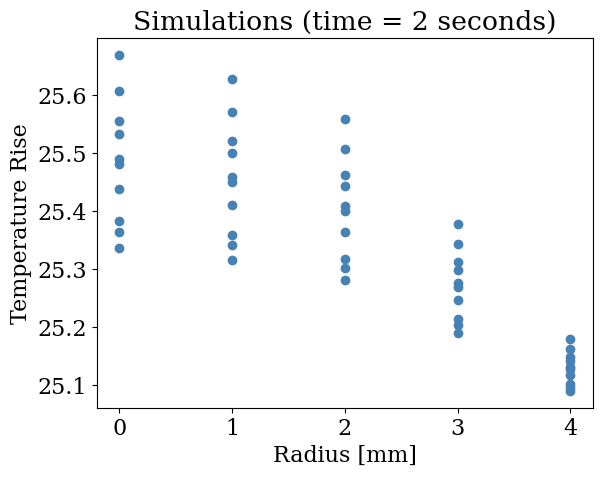

In [30]:
def simulationPlots(pointsByTime,time):
    plt.title('Simulations (time = %i seconds)'%time)
    plt.xlabel('Radius [mm]')
    plt.ylabel('Temperature Rise')
    plt.scatter(0*np.ones(len(pointsByTime[0])),np.array(pointsByTime[0])-273.15,color='steelblue')
    plt.scatter(1*np.ones(len(pointsByTime[1])),np.array(pointsByTime[1])-273.15,color='steelblue')
    plt.scatter(2*np.ones(len(pointsByTime[2])),np.array(pointsByTime[2])-273.15,color='steelblue')
    plt.scatter(3*np.ones(len(pointsByTime[3])),np.array(pointsByTime[3])-273.15,color='steelblue')
    plt.scatter(4*np.ones(len(pointsByTime[4])),np.array(pointsByTime[4])-273.15,color='steelblue')
    plt.xticks(range(0,5));
#     plt.savefig('figures/manuscript_EDDS/sim_t%i_rall.png'%time, dpi=300);
simulationPlots(pointsByTime2,time=2)

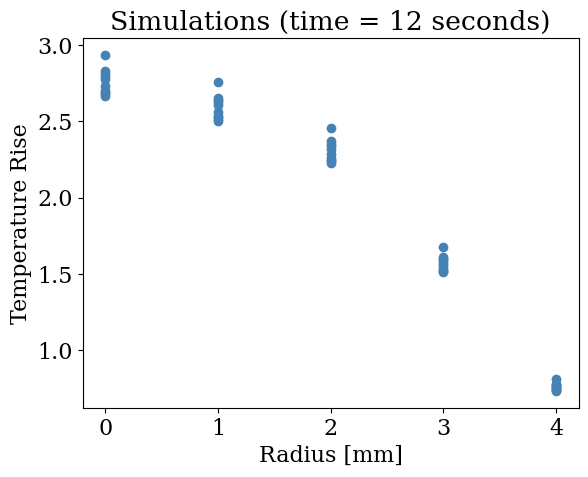

In [24]:
def simulationPlotsTempDiff(pointsByTime,time):
    plt.title('Simulations (time = %i seconds)'%time)
    plt.xlabel('Radius [mm]')
    plt.ylabel('Temperature Rise')
    plt.scatter(0*np.ones(len(pointsByTime[0])),np.array(pointsByTime[0])-298.15,color='steelblue')
    plt.scatter(1*np.ones(len(pointsByTime[1])),np.array(pointsByTime[1])-298.15,color='steelblue')
    plt.scatter(2*np.ones(len(pointsByTime[2])),np.array(pointsByTime[2])-298.15,color='steelblue')
    plt.scatter(3*np.ones(len(pointsByTime[3])),np.array(pointsByTime[3])-298.15,color='steelblue')
    plt.scatter(4*np.ones(len(pointsByTime[4])),np.array(pointsByTime[4])-298.15,color='steelblue')
    plt.xticks(range(0,5));
#     plt.savefig('figures/manuscript_EDDS/sim_t%i_rall.png'%time, dpi=300);
simulationPlots(pointsByTime12,time=12)

## Experiments

In [16]:
# tempE = pd.read_csv('data_exp/Temp_Diff_Data/exp_1W_0.5LPM.csv')
# tempET1 = [tempE['T1_t1'],tempE['T1_t2'],tempE['T1_t3']]
# tempET2 = [tempE['T2_t1'],tempE['T2_t2'],tempE['T2_t3']]
# tempET3 = [tempE['T3_t1'],tempE['T3_t2'],tempE['T3_t3']]
# tempET4 = [tempE['T4_t1'],tempE['T4_t2'],tempE['T4_t3']]

In [21]:
tempE = pd.read_csv('data_exp/Raw_Temp_Data/Air Temperature Measurments_1W_0.5LPM.csv')
tempET1 = [tempE['T1T1'],tempE['T2T1'],tempE['T3T1']]
tempET2 = [tempE['T1T2'],tempE['T2T2'],tempE['T3T2']]
tempET3 = [tempE['T1T3'],tempE['T2T3'],tempE['T3T3']]
tempET4 = [tempE['T1T4'],tempE['T2T4'],tempE['T3T4']]
tempE

,Time,T1T1,T1T2,T1T3,T1T4,T2T1,T2T2,T2T3,T2T4,T3T1,T3T2,T3T3,T3T4
0,0.00,20.6,21.1,20.9,20.7,20.9,21.6,21.2,21.0,21.1,21.7,21.3,21.3
1,0.25,20.6,21.2,21.0,20.7,20.9,21.6,21.2,21.0,21.1,21.7,21.3,21.3
2,0.50,20.6,21.2,20.9,20.7,20.8,21.6,21.2,21.0,21.1,21.7,21.4,21.3
3,0.75,20.6,21.2,20.9,20.7,20.8,21.5,21.2,21.0,21.1,21.7,21.4,21.3
4,1.00,20.6,21.2,21.0,20.7,20.9,21.5,21.2,21.0,21.1,21.7,21.3,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,229.00,20.9,21.5,21.2,21.0,21.1,21.7,21.3,21.3,21.2,21.8,21.5,21.4
917,229.25,20.9,21.5,21.2,21.0,21.0,21.7,21.3,21.2,21.2,21.8,21.3,21.4
918,229.50,20.9,21.5,21.2,21.0,21.0,21.6,21.3,21.2,21.2,21.8,21.3,21.4
919,229.75,20.9,21.5,21.1,21.0,21.1,21.7,21.3,21.3,21.2,21.8,21.5,21.4


In [31]:
pt0E = [tempET2[0],tempET2[1],tempET2[2]] #center
pt1E = [tempET3[0],tempET3[1],tempET3[2]] #1mm
pt2E = [tempET1[0],tempET1[1],tempET1[2]] #2mm
pt4E = [tempET4[0],tempET4[1],tempET4[2]] #4mm

In [32]:
timeE = tempE['Time']
timeE = timeE[75:150]-20
time_allE = list(timeE)
p0t0E,p1t0E,p2t0E,p4t0E = [],[],[],[]
p0t2E,p1t2E,p2t2E,p4t2E = [],[],[],[]
p0t5E,p1t5E,p2t5E,p4t5E = [],[],[],[]
p0t10E,p1t10E,p2t10E,p4t10E = [],[],[],[]
p0t11E,p1t11E,p2t11E,p4t11E = [],[],[],[]
p0t12E,p1t12E,p2t12E,p4t12E = [],[],[],[]
i = 0
while i<3:
    p0 = pt0E[i]
    p1 = pt1E[i]
    p2 = pt2E[i]
    p4 = pt4E[i]
    indx0E = time_allE.index(0)
    p0t0E.append(p0[indx0E+75]);p1t0E.append(p1[indx0E+75]);p2t0E.append(p2[indx0E+75]);p4t0E.append(p4[indx0E+75])
    indx2E = time_allE.index(2)
    p0t2E.append(p0[indx2E+75]);p1t2E.append(p1[indx2E+75]);p2t2E.append(p2[indx2E+75]);p4t2E.append(p4[indx2E+75])
    indx5E = time_allE.index(5)
    p0t5E.append(p0[indx5E+75]);p1t5E.append(p1[indx5E+75]);p2t5E.append(p2[indx5E+75]);p4t5E.append(p4[indx5E+75])
    indx10E = time_allE.index(10)
    p0t10E.append(p0[indx10E+75]);p1t10E.append(p1[indx10E+75]);p2t10E.append(p2[indx10E+75]);p4t10E.append(p4[indx10E+75])
    indx11E = time_allE.index(11)
    p0t11E.append(p0[indx11E+75]);p1t11E.append(p1[indx11E+75]);p2t11E.append(p2[indx11E+75]);p4t11E.append(p4[indx11E+75])
    indx12E = time_allE.index(12)
    p0t12E.append(p0[indx12E+75]);p1t12E.append(p1[indx12E+75]);p2t12E.append(p2[indx12E+75]);p4t12E.append(p4[indx12E+75])
    i+=1

In [33]:
pointsByTime2E = np.array([p0t2E,p1t2E,p2t2E,p4t2E]);
pointsByTime5E = np.array([p0t5E,p1t5E,p2t5E,p4t5E]);
pointsByTime10E = np.array([p0t10E,p1t10E,p2t10E,p4t10E]);
pointsByTime11E = np.array([p0t11E,p1t11E,p2t11E,p4t11E]);
pointsByTime12E = np.array([p0t12E,p1t12E,p2t12E,p4t12E]);

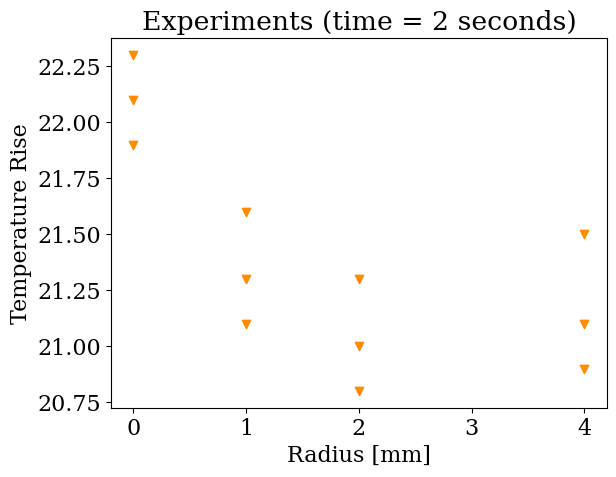

In [35]:
def simulationPlots(pointsByTimeE,time):
    plt.title('Experiments (time = %i seconds)'%time)
    plt.xlabel('Radius [mm]')
    plt.ylabel('Temperature Rise')
    plt.scatter(0*np.ones(len(pointsByTimeE[0])),pointsByTimeE[0],color='darkorange',marker='v')
    plt.scatter(1*np.ones(len(pointsByTimeE[1])),pointsByTimeE[1],color='darkorange',marker='v')
    plt.scatter(2*np.ones(len(pointsByTimeE[2])),pointsByTimeE[2],color='darkorange',marker='v')
    plt.scatter(4*np.ones(len(pointsByTimeE[3])),pointsByTimeE[3],color='darkorange',marker='v')
    plt.xticks(range(0,5));
    plt.savefig('figures/manuscript_EDDS/exp_t%i_rall.png'%time, dpi=300);
simulationPlots(pointsByTime2E,time=2)

##  Sim. vs. Exp

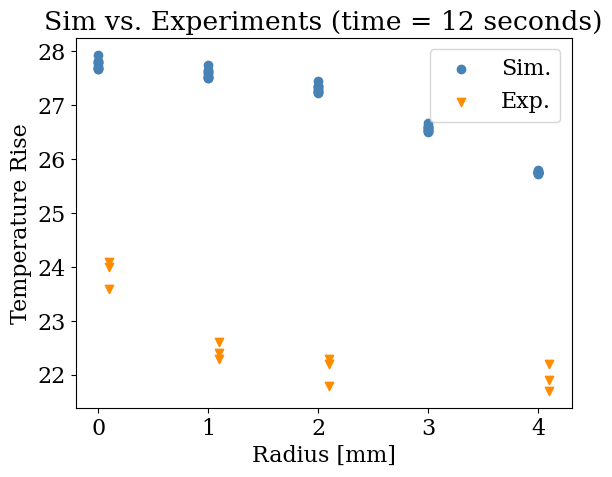

In [42]:
def simulationPlots(pointsByTime,pointsByTimeE,time):
    plt.title('Sim vs. Experiments (time = %i seconds)'%time)
    plt.xlabel('Radius [mm]')
    plt.ylabel('Temperature Rise')
    plt.scatter(0*np.ones(len(pointsByTime[0])),np.array(pointsByTime[0])-273.15,label='Sim.',color='steelblue')
    plt.scatter(1*np.ones(len(pointsByTime[1])),np.array(pointsByTime[1])-273.15,color='steelblue')
    plt.scatter(2*np.ones(len(pointsByTime[2])),np.array(pointsByTime[2])-273.15,color='steelblue')
    plt.scatter(3*np.ones(len(pointsByTime[3])),np.array(pointsByTime[3])-273.15,color='steelblue')
    plt.scatter(4*np.ones(len(pointsByTime[4])),np.array(pointsByTime[4])-273.15,color='steelblue')
    plt.scatter(0.1*np.ones(len(pointsByTimeE[0])),np.abs(pointsByTimeE[0]),label='Exp.',marker='v',color='darkorange')
    plt.scatter(1.1*np.ones(len(pointsByTimeE[1])),np.abs(pointsByTimeE[1]),marker='v',color='darkorange')
    plt.scatter(2.1*np.ones(len(pointsByTimeE[2])),np.abs(pointsByTimeE[2]),marker='v',color='darkorange')
    plt.scatter(4.1*np.ones(len(pointsByTimeE[3])),np.abs(pointsByTimeE[3]),marker='v',color='darkorange')
    plt.legend()
    plt.xticks(range(0,5));
    plt.savefig('figures/manuscript_EDDS/expSim_t%i_rall.png'%time, dpi=300);
simulationPlots(pointsByTime12,pointsByTime12E,time=12)

## Calculate ECDF & Area Metric 

In [43]:
# for this function y1 < y2
def ecdfSum(x1,x2,y1,y2):
    l = np.abs(x1-x2) # length
    w = y1-y2 # width
    area = l*w
    return(area)
def areaDiff(xs,ys,xe,ye):
    area = 0 
    if len(xs)<len(xe):
        maxlen = len(xe);
    if len(xs)>len(xe):
        maxlen = len(xs);
    i,j,p = 1,1,0;
    while i < maxlen-1 and j < maxlen-1:
        if ys[i] < ye[j]:
            areatemp = ecdfSum(xs[i],xe[j],ys[i],p)
            area += areatemp
            p = ys[i]
            i+=1;
        if ys[i] > ye[j]:
            areatemp = ecdfSum(xe[j],xs[i],ye[j],p)
            area += areatemp
            p = ye[j]
            j+=1;
        if ys[i] == ye[j]:
            areatemp = ecdfSum(xe[j],xs[i],ys[i],p)
            area += areatemp
            p = ys[i]
            j+=1;
            i+=1;
    print('Area between ECDF\'s =',area)
    return(area)

In [44]:
### Test Data 
x1_test = [0.5,1.0,2.0,4.0,5.0]
y1_test = [0.0,0.1,0.3,0.75,1.0]
x2_test = [1.5,3.0,6.0,7.0]
y2_test = [0.0,0.5,0.8,1.0]
# plt.step([0.5,1.0,2.0,4.0,5.0],[0,0.1,0.3,0.75,1.0],where='post',);
# plt.step([1.5,3.0,6.0,7.0],[0,0.5,0.8,1.0],where='post',);
xs,ys,xe,ye = x1_test,y1_test,x2_test,y2_test
print('area diff', areaDiff(xs,ys,xe,ye))


Area between ECDF's = 1.55
area diff 1.55


In [60]:
### Point = Center, Time = 2sec
print('0mm time =2sec')
ecdf = ECDF(np.array(p0t2)-273.15)
ecdfE= ECDF(p0t2E)
metricp0t2 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t2)-273.15)
# print('Mean y2=',np.mean(p0t2E))
print('Diff Mean=',np.abs(np.mean(p0t2)-273.15 - np.mean(p0t2E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t2)-273.15 - np.mean(p0t2E))/np.mean([np.mean(p0t2)-273.15,np.mean(p0t2E)]))

### Point = Center, Time = 5sec
print('0mm time =5sec')
ecdf = ECDF(np.array(p0t5)-273.15)
ecdfE=ECDF(p0t5E)
metricp0t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t5)-273.15)
# print('Mean y2=',np.mean(p0t5E))
print('Diff Mean=',np.abs(np.mean(p0t5)-273.15 - np.mean(p0t5E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t5)-273.15 - np.mean(p0t5E))/np.mean([np.mean(p0t5)-273.15 , np.mean(p0t5E)]))
### Point = Center, Time = 10sec
print('0mm time =10sec')
ecdf = ECDF(np.array(p0t10)-273.15)
ecdfE=ECDF(p0t10E)
metricp0t10 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t10)-273.15)
# print('Mean y2=',np.mean(p0t10E))
print('Diff Mean=',np.abs(np.mean(p0t10)-273.15 - np.mean(p0t10E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t10)-273.15 - np.mean(p0t10E))/np.mean([np.mean(p0t10)-273.15,np.mean(p0t10E)]))
### Point = Center, Time = 11sec
print('0mm time =11sec')
ecdf = ECDF(np.array(p0t11)-273.15)
ecdfE=ECDF(p0t11E)
metricp0t11 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t11)-273.15)
# print('Mean y2=',np.mean(p0t11E))
print('Diff Mean=',np.abs(np.mean(p0t11)-273.15 - np.mean(p0t11E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t11)-273.15 - np.mean(p0t11E))/np.mean([np.mean(p0t11)-273.15,np.mean(p0t11E)]))
### Point = Center, Time = 12sec
print('0mm time =12sec')
ecdf = ECDF(np.array(p0t12)-273.15)
ecdfE=ECDF(p0t12E)
metricp0t12 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t12)-273.15)
# print('Mean y2=',np.mean(p0t12E))
print('Diff Mean=',np.abs(np.mean(p0t12)-273.15 - np.mean(p0t12E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t12)-273.15 - np.mean(p0t12E))/np.mean([np.mean(p0t12)-273.15,np.mean(p0t12E)]))
# ### Point = Center, Time = 2sec
# print('0mm time =2sec')
# ecdf = ECDF(np.array(p0t2)-273.15)
# ecdfE=ECDF(p0t2E)
# metricp0t2 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# # print('Mean y1=',np.mean(p0t2)-273.15)
# # print('Mean y2=',np.mean(p0t2E))
# print('Diff Mean=',np.abs(np.mean(p0t2)-273.15 - np.mean(p0t2E)))
# print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t2)-273.15 - np.mean(p0t2E))/np.mean([np.mean(p0t2)-273.15,np.mean(p0t2E)]))
print('*******************************')
### Point = 1mm, Time = 2sec
print('1mm time =2sec')
ecdf = ECDF(np.array(p1t2)-273.15)
ecdfE=ECDF(p1t2E)
metricp1t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p1t2)-273.15)
# print('Mean y2=',np.mean(p1t2E))
print('Diff Mean=',np.abs(np.mean(p1t2)-273.15 - np.mean(p1t2E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p1t2)-273.15 - np.mean(p1t2E))/np.mean([np.mean(p1t2)-273.15, np.mean(p1t2E)]))
### Point = 1mm, Time = 5sec
print('1mm time =5sec')
ecdf = ECDF(np.array(p1t5)-273.15)
ecdfE=ECDF(p1t5E)
metricp1t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p1t5)-273.15)
# print('Mean y2=',np.mean(p1t5E))
print('Diff Mean=',np.abs(np.mean(p1t5)-273.15 - np.mean(p1t5E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p1t5)-273.15 - np.mean(p1t5E))/np.mean([np.mean(p1t5)-273.15, np.mean(p1t5E)]))
### Point = Center, Time = 10sec
print('1mm time =10sec')
ecdf = ECDF(np.array(p1t10)-273.15)
ecdfE=ECDF(p1t10E)
metricp1t10 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p1t10)-273.15)
# print('Mean y2=',np.mean(p1t10E))
print('Diff Mean=',np.abs(np.mean(p1t10)-273.15 - np.mean(p1t10E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p1t10)-273.15 - np.mean(p1t10E))/np.mean([np.mean(p1t10)-273.15,np.mean(p1t10E)]))
### Point = Center, Time = 11sec
print('1mm time =11sec')
ecdf = ECDF(np.array(p1t11)-273.15)
ecdfE=ECDF(p1t11E)
metricp1t11 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p1t11)-273.15)
# print('Mean y2=',np.mean(p1t11E))
print('Diff Mean=',np.abs(np.mean(p1t11)-273.15 - np.mean(p1t11E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p1t11)-273.15 - np.mean(p1t11E))/np.mean([np.mean(p1t11)-273.15,np.mean(p1t11E)]))
### Point = Center, Time = 12sec
print('1mm time =12sec')
ecdf = ECDF(np.array(p1t12)-273.15)
ecdfE=ECDF(p1t12E)
metricp1t12 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t12)-273.15)
# print('Mean y2=',np.mean(p0t12E))
print('Diff Mean=',np.abs(np.mean(p1t12)-273.15 - np.mean(p1t12E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p1t12)-273.15 - np.mean(p1t12E))/np.mean([np.mean(p1t12)-273.15,np.mean(p1t12E)]))
print('*******************************')
### Point = 2mm, Time = 2sec
print('2mm time =2sec')
ecdf = ECDF(np.array(p2t2)-273.15)
ecdfE=ECDF(p2t2E)
metricp2t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p2t2)-273.15)
# print('Mean y2=',np.mean(p2t2E))
print('Diff Mean=',np.abs(np.mean(p2t2)-273.15 - np.mean(p2t2E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p2t2)-273.15 - np.mean(p2t2E))/np.mean([np.mean(p2t2)-273.15, np.mean(p2t2E)]))
### Point = 2mm, Time = 5sec
print('2mm time =5sec')
ecdf = ECDF(np.array(p2t5)-273.15)
ecdfE=ECDF(p2t5E)
metricp2t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p2t5)-273.15)
# print('Mean y2=',np.mean(p2t5E))
print('Diff Mean=',np.abs(np.mean(p2t5)-273.15 - np.mean(p2t5E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p2t5)-273.15 - np.mean(p2t5E))/np.mean([np.mean(p2t5)-273.15, np.mean(p2t5E)]))
### Point = Center, Time = 10sec
print('2mm time =10sec')
ecdf = ECDF(np.array(p2t10)-273.15)
ecdfE=ECDF(p2t10E)
metricp2t10 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p2t10)-273.15)
# print('Mean y2=',np.mean(p2t10E))
print('Diff Mean=',np.abs(np.mean(p2t10)-273.15 - np.mean(p2t10E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p2t10)-273.15 - np.mean(p2t10E))/np.mean([np.mean(p2t10)-273.15,np.mean(p2t10E)]))
### Point = Center, Time = 11sec
print('2mm time =11sec')
ecdf = ECDF(np.array(p2t11)-273.15)
ecdfE=ECDF(p2t11E)
metricp2t11 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p2t11)-273.15)
# print('Mean y2=',np.mean(p2t11E))
print('Diff Mean=',np.abs(np.mean(p2t11)-273.15 - np.mean(p2t11E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p2t11)-273.15 - np.mean(p2t11E))/np.mean([np.mean(p2t11)-273.15,np.mean(p2t11E)]))
### Point = Center, Time = 12sec
print('2mm time =12sec')
ecdf = ECDF(np.array(p2t12)-273.15)
ecdfE=ECDF(p2t12E)
metricp2t12 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p0t12)-273.15)
# print('Mean y2=',np.mean(p0t12E))
print('Diff Mean=',np.abs(np.mean(p2t12)-273.15 - np.mean(p2t12E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p2t12)-273.15 - np.mean(p2t12E))/np.mean([np.mean(p2t12)-273.15,np.mean(p2t12E)]))
print('*******************************')
###########
### Point = 4mm, Time = 2sec
print('4mm time =2sec')
ecdf = ECDF(np.array(p4t2)-273.15)
ecdfE=ECDF(p4t2E)
metricp4t2 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p4t2)-273.15)
# print('Mean y2=',np.mean(p4t2E))
print('Diff Mean=',np.abs(np.mean(p4t2)-273.15 - np.mean(p4t2E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p4t2)-273.15 - np.mean(p4t2E))/np.mean([np.mean(p4t2)-273.15, np.mean(p4t2E)]))
### Point = 4mm, Time = 5sec
print('4mm time =5sec')
ecdf = ECDF(np.array(p4t5)-273.15)
ecdfE=ECDF(p4t5E)
metricp4t5 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p4t5)-273.15)
# print('Mean y2=',np.mean(p4t5E))
print('Diff Mean=',np.abs(np.mean(p4t5)-273.15 - np.mean(p4t5E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p4t5)-273.15 - np.mean(p4t5E))/np.mean([np.mean(p4t5)-273.15, np.mean(p4t5E)]))
### Point = 4mm, Time = 10sec
print('4mm time =10sec')
ecdf = ECDF(np.array(p4t10)-273.15)
ecdfE=ECDF(p4t10E)
metricp4t10 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p4t10)-273.15)
# print('Mean y2=',np.mean(p4t10E))
print('Diff Mean=',np.abs(np.mean(p4t10)-273.15 - np.mean(p4t10E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p4t10)-273.15 - np.mean(p4t10E))/np.mean([np.mean(p4t10)-273.15,np.mean(p4t10E)]))
### Point = 4mm, Time = 11sec
print('4mm time =11sec')
ecdf = ECDF(np.array(p4t11)-273.15)
ecdfE=ECDF(p4t11E)
metricp4t11 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p4t11)-273.15)
# print('Mean y2=',np.mean(p4t11E))
print('Diff Mean=',np.abs(np.mean(p4t11)-273.15 - np.mean(p4t11E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p4t11)-273.15 - np.mean(p4t11E))/np.mean([np.mean(p4t11)-273.15,np.mean(p4t11E)]))
### Point = 4mm, Time = 12sec
print('4mm time =12sec')
ecdf = ECDF(np.array(p4t12)-273.15)
ecdfE=ECDF(p4t12E)
metricp4t12 = areaDiff(np.array(ecdf.x ),np.array(ecdf.y ),np.array(ecdfE.x ),np.array(ecdfE.y ))
# print('Mean y1=',np.mean(p4t12)-273.15)
# print('Mean y2=',np.mean(p4t12E))
print('Diff Mean=',np.abs(np.mean(p4t12)-273.15 - np.mean(p4t12E)))
print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p4t12)-273.15 - np.mean(p4t12E))/np.mean([np.abs(np.mean(p4t12)-273.15),np.mean(p4t12E)]))
print('*******************************')

0mm time =2sec
Area between ECDF's = 3.385833700000029
Diff Mean= 3.3858337000000027
Diff Mean/Avg Means= 14.230427153365197
0mm time =5sec
Area between ECDF's = 3.781078133333354
Diff Mean= 3.7810781333333523
Diff Mean/Avg Means= 15.211195392983983
0mm time =10sec
Area between ECDF's = 3.862121600000028
Diff Mean= 3.862121600000048
Diff Mean/Avg Means= 14.836589371724894
0mm time =11sec
Area between ECDF's = 3.9006592000000238
Diff Mean= 3.9006592000000317
Diff Mean/Avg Means= 14.973550277076072
0mm time =12sec
Area between ECDF's = 3.86251830000001
Diff Mean= 3.8625183000000085
Diff Mean/Avg Means= 14.952884323488378
*******************************
1mm time =2sec
Area between ECDF's = 4.122223966666692
Diff Mean= 4.122223966666677
Diff Mean/Avg Means= 17.620524491469446
1mm time =5sec
Area between ECDF's = 4.8735524333333515
Diff Mean= 4.873552433333359
Diff Mean/Avg Means= 20.135781743221827
1mm time =10sec
Area between ECDF's = 5.347001066666689
Diff Mean= 5.347001066666678
Diff Me

In [62]:
 print('Diff Mean/Avg Means=', 100*np.abs(np.mean(p0t12)-273.15 - np.mean(p0t12E))/np.mean([np.mean(p0t12)-273.15,np.mean(p0t12E)]))

Diff Mean/Avg Means= 14.952884323488378


## Confidence interval

In [63]:
def ci(conf,data,sim):
#     ci = np.array(st.t.interval(confidence=conf, df=len(data)-1, 
#                   loc=np.mean(data), 
#                   scale=st.sem(data))) # python newer
    ci = np.array(st.t.interval(alpha=conf, df=len(data)-1, 
                  loc=np.mean(data), 
                  scale=st.sem(data))) # python 3.8.8
    if sim == True:ci = ci-273.15#-298.15;
    return ci

In [48]:
# #### Tolerance Interval Attempt!!!!! maybe just stick to CI???
# data = np.array(dataExp[0])
# n = len(data)
# aplha = 0.01 # confidence level 99%
# coverage = 0.95 # coverage (tolerance level) 95%
# mean = np.mean(data)
# std = np.std(data,ddof=1)
# z = norm.ppf((1+coverage)/2) # inverse of standard normal dist
# ti = (mean-z*std_dev,mean+z*std_dev)#tolerance interval

# dof=len(data)-1
# coverage = 0.90
# confidence = 0.80
# prop_inv = (1.0 - coverage)/ 2.0
# gauss_critical = norm.isf(prop_inv)
# chi_critical = chi2.isf(q=confidence,df=dof)
# interval = np.sqrt((dof*(1+1*(1/len(data)))*gauss_critical**2)/chi_critical)
# interval

In [49]:
# #### Tolerance Interval Attempt 2!!!!!
# def ti(conf,coverage,data,sim):
#     n = len(data)
#     aplha = 1-conf # confidence level 99%
#     mean = np.mean(data)
#     std = np.std(data,ddof=1)
#     z = norm.ppf((1+coverage)/2) # inverse of standard normal dist
#     ti = (mean-298.15-z*std,mean-298.15+z*std)#tolerance interval
#     return(ti)

In [64]:
def ti(conf,coverage,data,sim):
    n = len(data)
    alpha = conf # confidence level 99% 
    confidence = 1-alpha
    dof = n-1 # v
    avg = np.mean(data)
    std = np.std(data)
    z = norm.ppf((1+coverage)/2) # inverse of standard normal dist
    chi = chi2.isf(q=confidence,df=dof)
    k = z*np.sqrt(dof*(1+(1/n))/chi)
    ti = np.array([(avg-(k*std)),(avg+(k*std))])
    if sim == True:ti = ti-273.15#-298.15;
    return(ti)

In [65]:
# data = np.array(dataSim[0])
# n = len(data)
# aplha = 0.99 # confidence level 99% 
# confidence = 1-alpha
# coverage = 0.90 # coverage (tolerance level,AKA proportion) 95%
# dof = n-1 # v
# meanSim = np.mean(data)
# stdSim = np.std(data)
# z = norm.ppf((1+coverage)/2) # inverse of standard normal dist
# chi = chi2.isf(q=confidence,df=dof)
# k = z*np.sqrt(dof*(1+(1/n))/chi)
# ti = ((meanSim-(k*stdSim)-298.15),(meanSim+(k*stdSim)-298.15))
# ti

In [66]:
ti(0.99,0.90,dataSim[0],True)

array([27.94010235, 28.06121605])

In [71]:
def SimvsExp(dataSim,dataExp,time,conf,cov):
    confidence = conf
    conf = conf/100
    coverage = cov/100
    
    plt.figure(figsize=(8,5))
    plt.title('Sim vs. Experiments (time = %s seconds)'%time)
    plt.xlabel('Radius [mm]')
    plt.ylabel('Temperature Rise')
    lw = 3
    
    plt.scatter(0*np.ones(len(dataSim[0])),np.array(dataSim[0])-273.15,label='Sim.',color='steelblue')
    plt.vlines(x= -0.15, ymin=ci(conf,dataSim[0],True)[0], ymax=ci(conf,dataSim[0],True)[1],color='steelblue',label='Sim CI %i%%'%confidence,linewidth=lw)
    plt.scatter(x= -0.15, y=ci(conf,dataSim[0],True)[0],marker='_',color='steelblue')
    plt.scatter(x= -0.15, y=ci(conf,dataSim[0],True)[1],marker='_',color='steelblue')
    
    plt.vlines(x= -0.25, ymin= ti(conf,coverage,dataSim[0],True)[0], ymax=ti(conf,coverage,dataSim[0],True)[1],color='red',label='Sim TI %i%% CI %i%%'%(coverage*100,confidence))
    plt.scatter(x= -0.25, y= ti(conf,coverage,dataSim[0],True)[0],marker='_',color='red')
    plt.scatter(x= -0.25, y= ti(conf,coverage,dataSim[0],True)[1],marker='_',color='red')
    
    plt.scatter(1*np.ones(len(dataSim[1])),np.array(dataSim[1])-273.15,color='steelblue')
    plt.vlines(x= .85, ymin=ci(conf,dataSim[1],True)[0], ymax=ci(conf,dataSim[1],True)[1],color='steelblue',linewidth=lw)
    plt.scatter(x= .85, y=ci(conf,dataSim[1],True)[0],marker='_',color='steelblue')
    plt.scatter(x= .85, y=ci(conf,dataSim[1],True)[1],marker='_',color='steelblue')
    
    plt.vlines(x= 0.75, ymin= ti(conf,coverage,dataSim[1],True)[0], ymax=ti(conf,coverage,dataSim[1],True)[1],color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 0.75, y= ti(conf,coverage,dataSim[1],True)[0],marker='_',color='red')
    plt.scatter(x= 0.75, y= ti(conf,coverage,dataSim[1],True)[1],marker='_',color='red')
    
    plt.scatter(2*np.ones(len(dataSim[2])),np.array(dataSim[2])-273.15,color='steelblue')
    plt.vlines(x= 1.85, ymin=ci(conf,dataSim[2],True)[0], ymax=ci(conf,dataSim[2],True)[1],color='steelblue',linewidth=lw)
    plt.scatter(x= 1.85, y=ci(conf,dataSim[2],True)[0],marker='_',color='steelblue')
    plt.scatter(x= 1.85, y=ci(conf,dataSim[2],True)[1],marker='_',color='steelblue')
    
    plt.vlines(x= 1.75, ymin= ti(conf,coverage,dataSim[2],True)[0], ymax=ti(conf,coverage,dataSim[2],True)[1],color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 1.75, y= ti(conf,coverage,dataSim[2],True)[0],marker='_',color='red')
    plt.scatter(x= 1.75, y= ti(conf,coverage,dataSim[2],True)[1],marker='_',color='red')
    
    plt.scatter(3*np.ones(len(dataSim[3])),np.array(dataSim[3])-273.15,color='steelblue')
    plt.vlines(x= 2.85, ymin=ci(conf,dataSim[3],True)[0], ymax=ci(conf,dataSim[3],True)[1],color='steelblue',linewidth=lw)
    plt.scatter(x= 2.85, y=ci(conf,dataSim[3],True)[0],marker='_',color='steelblue')
    plt.scatter(x= 2.85, y=ci(conf,dataSim[3],True)[1],marker='_',color='steelblue')
    
    plt.vlines(x= 2.75, ymin= ti(conf,coverage,dataSim[3],True)[0], ymax=ti(conf,coverage,dataSim[3],True)[1],color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 2.75, y= ti(conf,coverage,dataSim[3],True)[0],marker='_',color='red')
    plt.scatter(x= 2.75, y= ti(conf,coverage,dataSim[3],True)[1],marker='_',color='red')
    
    plt.scatter(4*np.ones(len(dataSim[4])),np.array(dataSim[4])-273.15,color='steelblue')
    plt.vlines(x= 3.85, ymin=ci(conf,dataSim[4],True)[0], ymax=ci(conf,dataSim[4],True)[1],color='steelblue',linewidth=lw)
    plt.scatter(x= 3.85, y=ci(conf,dataSim[4],True)[0],marker='_',color='steelblue')
    plt.scatter(x= 3.85, y=ci(conf,dataSim[4],True)[1],marker='_',color='steelblue')
    
    plt.vlines(x= 3.75, ymin= ti(conf,coverage,dataSim[4],True)[0], ymax=ti(conf,coverage,dataSim[4],True)[1],color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 3.75, y= ti(conf,coverage,dataSim[4],True)[0],marker='_',color='red')
    plt.scatter(x= 3.75, y= ti(conf,coverage,dataSim[4],True)[1],marker='_',color='red')

    plt.scatter(0.15*np.ones(len(dataExp[0])),np.abs(dataExp[0]),label='Exp.',marker='v',color='darkorange')
    plt.vlines(x= 0.3, ymin=ci(conf,dataExp[0],False)[0], ymax=ci(conf,dataExp[0],False)[1],color='darkorange',label='Exp CI %i%% '%confidence,linewidth=lw)
    plt.scatter(x= 0.3, y=ci(conf,dataExp[0],False)[0],marker='_',color='darkorange')
    plt.scatter(x= 0.3, y=ci(conf,dataExp[0],False)[1],marker='_',color='darkorange')

    plt.vlines(x= 0.4, ymin= ti(conf,coverage,dataExp[0],False)[0], ymax=ti(conf,coverage,dataExp[0],False)[1], linestyle='dashed',color='red')#,label='CI 95%')
    plt.scatter(x= 0.4, y= ti(conf,coverage,dataExp[0],False)[0],marker='_',color='red')
    plt.scatter(x= 0.4, y= ti(conf,coverage,dataExp[0],False)[1],marker='_',color='red')
    
    plt.scatter(1.25*np.ones(len(dataExp[1])),np.abs(dataExp[1]),marker='v',color='darkorange')
    plt.vlines(x= 1.35, ymin=ci(conf,dataExp[1],False)[0], ymax=ci(conf,dataExp[1],False)[1],color='darkorange',linewidth=lw)
    plt.scatter(x= 1.35, y=ci(conf,dataExp[1],False)[0],marker='_',color='darkorange')
    plt.scatter(x= 1.35, y=ci(conf,dataExp[1],False)[1],marker='_',color='darkorange')
    
    plt.vlines(x= 1.45, ymin= ti(conf,coverage,dataExp[1],False)[0], ymax=ti(conf,coverage,dataExp[1],False)[1], linestyle='dashed',color='red',label='Exp TI %i%% CI %i%%'%(coverage*100,confidence))
    plt.scatter(x= 1.45, y= ti(conf,coverage,dataExp[1],False)[0],marker='_',color='red')
    plt.scatter(x= 1.45, y= ti(conf,coverage,dataExp[1],False)[1],marker='_',color='red')
    
    plt.scatter(2.2*np.ones(len(dataExp[2])),np.abs(dataExp[2]),marker='v',color='darkorange')
    plt.vlines(x= 2.3, ymin=ci(conf,dataExp[2],False)[0], ymax=ci(conf,dataExp[2],False)[1],color='darkorange',linewidth=lw)
    plt.scatter(x= 2.3, y=ci(conf,dataExp[2],False)[0],marker='_',color='darkorange')
    plt.scatter(x= 2.3, y=ci(conf,dataExp[2],False)[1],marker='_',color='darkorange')
    
    plt.vlines(x= 2.4, ymin= ti(conf,coverage,dataExp[2],False)[0], ymax=ti(conf,coverage,dataExp[2],False)[1], linestyle='dashed',color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 2.4, y= ti(conf,coverage,dataExp[2],False)[0],marker='_',color='red')
    plt.scatter(x= 2.4, y= ti(conf,coverage,dataExp[2],False)[1],marker='_',color='red')
    
    plt.scatter(4.2*np.ones(len(dataExp[4])),np.abs(dataExp[4]),marker='v',color='darkorange')
    plt.vlines(x= 4.3, ymin=ci(conf,dataExp[4],False)[0], ymax=ci(conf,dataExp[4],False)[1],color='darkorange',linewidth=lw)
    plt.scatter(x= 4.3, y=ci(conf,dataExp[4],False)[0],marker='_',color='darkorange')
    plt.scatter(x= 4.3, y=ci(conf,dataExp[4],False)[1],marker='_',color='darkorange')
    
    plt.vlines(x= 4.4, ymin= ti(conf,coverage,dataExp[4],False)[0], ymax=ti(conf,coverage,dataExp[4],False)[1], linestyle='dashed',color='red')#,label='CI %f TI %f'%(confidence,coverage))
    plt.scatter(x= 4.4, y= ti(conf,coverage,dataExp[4],False)[0],marker='_',color='red')
    plt.scatter(x= 4.4, y= ti(conf,coverage,dataExp[4],False)[1],marker='_',color='red')
        
#     plt.legend()#fontsize="12")
    plt.xticks(range(0,5));
#     plt.ylim(0.0,3.25)


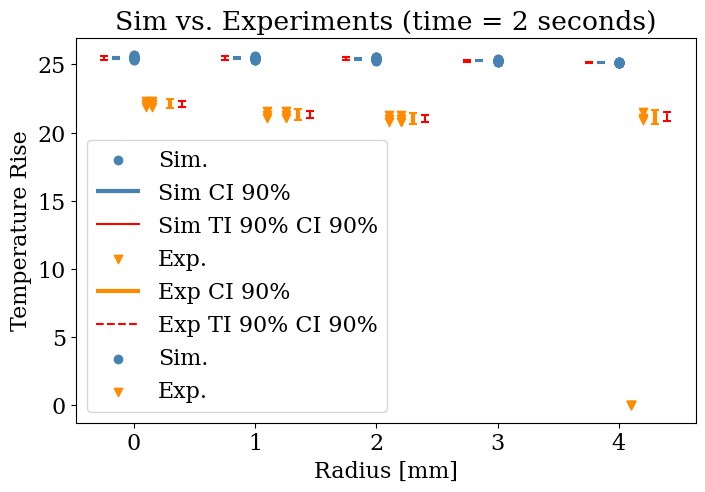

In [72]:
dataSim = np.array([p0t2,p1t2,p2t2,p3t2,p4t2])
dataExp = np.array([p0t2E,p1t2E,p2t2E,[0,0,0],p4t2E])
SimvsExp(dataSim,dataExp,time=2,conf=90,cov=90)

# def simulationPlots(pointsByTime,pointsByTimeE,time):
#     plt.title('Sim vs. Exp at %i seconds'%time)
#     plt.xlabel('Radius [mm]')
#     plt.ylabel('Temperature Rise')
#     plt.savefig('figures/manuscript_EDDS/expSim_t%i_rall.png'%time, dpi=300);
# # simulationPlots(pointsByTime5,pointsByTime5E,time=5)
simulationPlots(dataSim,dataExp,time=2)


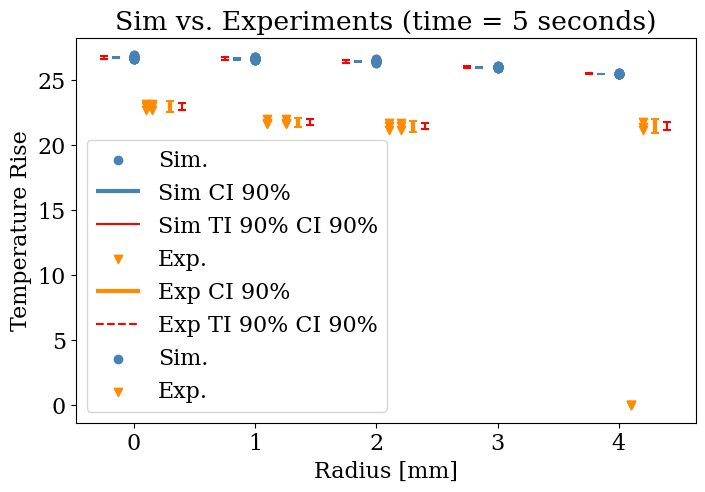

In [73]:
dataSim = np.array([p0t5,p1t5,p2t5,p3t5,p4t5])
dataExp = np.array([p0t5E,p1t5E,p2t5E,[0,0,0],p4t5E])
SimvsExp(dataSim,dataExp,time=5,conf=90,cov=90)
simulationPlots(dataSim,dataExp,time=5)

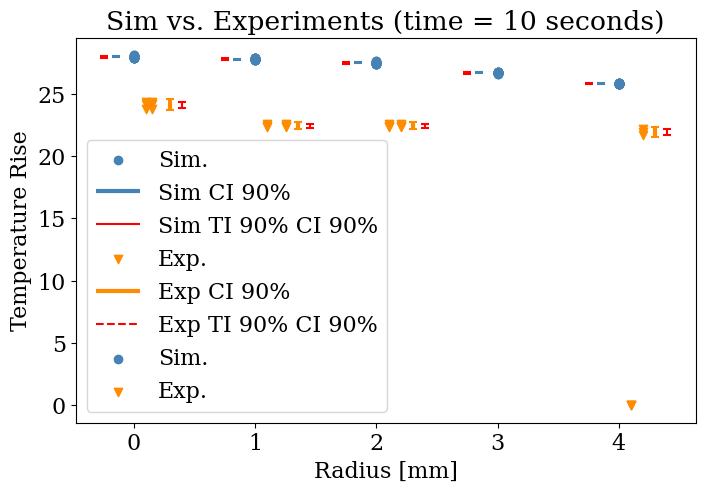

In [74]:
dataSim = np.array([p0t10,p1t10,p2t10,p3t10,p4t10])
dataExp = np.array([p0t10E,p1t10E,p1t10E,[0,0,0],p4t10E])
SimvsExp(dataSim,dataExp,time=10,conf=90,cov=90)
simulationPlots(dataSim,dataExp,time=10)

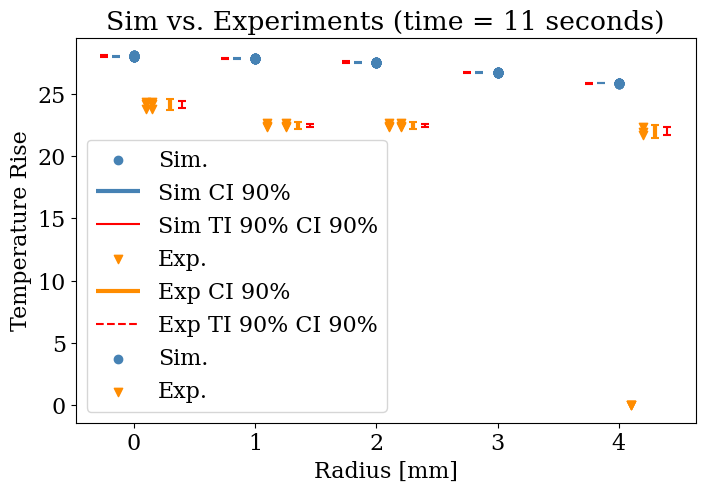

In [75]:
dataSim = np.array([p0t11,p1t11,p2t11,p3t11,p4t11])
dataExp = np.array([p0t11E,p1t11E,p1t11E,[0,0,0],p4t11E])
SimvsExp(dataSim,dataExp,time=11,conf=90,cov=90)
simulationPlots(dataSim,dataExp,time=11)

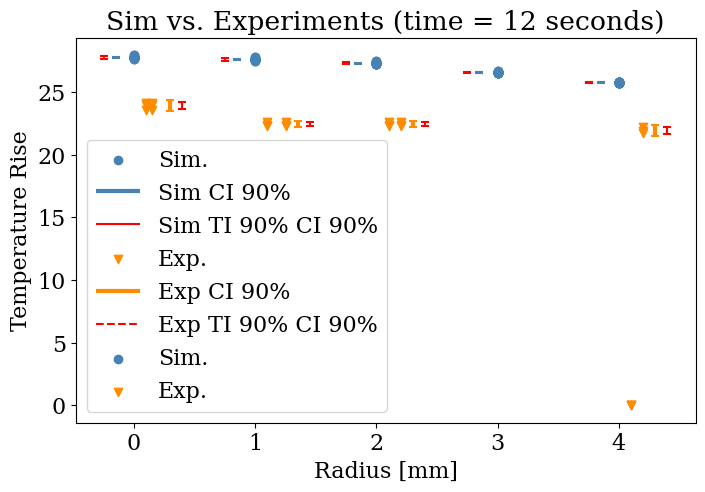

In [76]:
dataSim = np.array([p0t12,p1t12,p2t12,p3t12,p4t12])
dataExp = np.array([p0t12E,p1t12E,p1t12E,[0,0,0],p4t12E])
SimvsExp(dataSim,dataExp,time=12,conf=90,cov=90)
simulationPlots(dataSim,dataExp,time=12)

In [ ]:

# i,j = 0,0
# area = 0
# while i < len(x1) && j < len(x2):
#     if x1[i] < x2[j]:
#         lx = x2[j];sx = x1[i];
#     if x1[i] > x2[j]:
#         lx = x1[j];sx = x2[i];
#     if y1[i] < y2[j]:
#         ly = y2[j];sy = y1[j];
#     if y1[i] > y2[j]:
#         ly = y1[j];sy = y2[j];
#     w = lx-sx
#     h = ly-sy
#     area += w*h
#     ### Reconsider this scenario!!!!!!!
#     if y1[i+1] < y2[j]:
#         i += 1 
#     elif y1[i+1]>y2[j]:
#         w = x2[j]-x1[i+1]
#         h = y2[j]-x1[i]
#         area += w*h
#         i+=1
#         j+=1
#     else:
#         lx = x1[j];sx = x2[i]
#     w = lx-sx 
#     if y1[i] < y2[j]:
#         ly = y2[j];sy = y1[j];

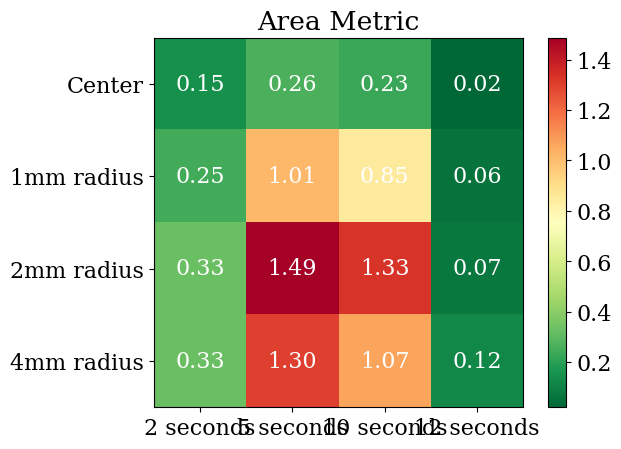

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
data = np.array([[0.1475,0.2622,0.2276,0.0213], 
                       [0.2477,1.0136,0.8495,0.0593],
                       [0.3288,1.4870,1.3319,0.0731],
                       [0.3292,1.3001,1.0670,0.1240]]) #areametric
# Define row and column labels
radius_labels = ["Center", "1mm radius", "2mm radius", "4mm radius"]
time_labels = ["2 seconds", "5 seconds", "10 seconds", "12 seconds"]

# Create a heatmap using matplotlib's imshow function
heatmap = plt.imshow(data, cmap='RdYlGn_r', interpolation='nearest')

# Set row and column labels
plt.xticks(np.arange(len(time_labels)), time_labels)
plt.yticks(np.arange(len(radius_labels)), radius_labels)

# Add values as text annotations
for i in range(len(radius_labels)):
    for j in range(len(time_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')

# Add colorbar to show the scale
plt.title('Area Metric')
plt.colorbar(heatmap)

# Show the plot
plt.show()